In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
from pylab import * 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import requests
import math
import re
import csv

## 2HDM (type IV) limits from the low mass dark photon search

### Evaluation of sinTheta limits starting from the upper limit on the cross section * BR * acceptance

`Acceptance` evaluated generating gg $\to$ A events with Pythia (model: gg2A3 inclusive)

`Cross section` computed using HiGLU+HDECAY generators
`Branching ratios` (A $\to \mu\mu$) retrieved from here: ([link](https://github.com/cecilecaillol/CMS_HAA_SummaryPlots/blob/master/BR/BR_IV_0.5.dat))

[ 0.00022185  0.01421709 -0.00445078]
Mass points considered: 
 [1.176  1.187  1.199  1.211  1.223  1.235  1.248  1.26   1.273  1.286
 1.299  1.312  1.325  1.338  1.351  1.365  1.378  1.392  1.406  1.42
 1.434  1.449  1.463  1.478  1.493  1.508  1.523  1.538  1.553  1.569
 1.584  1.6    1.616  1.632  1.649  1.665  1.682  1.699  1.716  1.733
 1.75   1.768  1.785  1.803  1.821  1.839  1.858  1.876  1.895  1.914
 1.933  1.953  1.972  1.992  2.012  2.032  2.052  2.073  2.094  2.114
 2.136  2.157  2.179  2.2    2.222  2.245  2.267  2.29   2.313  2.336
 2.359  2.383  2.406  2.43   2.455  2.479  2.504  2.529  2.554  2.58
 2.5801 4.2009 4.201  4.243  4.286  4.328  4.372  4.415  4.46   4.504
 4.549  4.595  4.641  4.687  4.734  4.781  4.829  4.877  4.926  4.975
 5.025  5.075  5.126  5.177  5.229  5.282  5.334  5.388  5.442  5.496
 5.551  5.606  5.663  5.719  5.776  5.834  5.892  5.951  6.011  6.071
 6.132  6.193  6.255  6.318  6.381  6.445  6.509  6.574  6.64   6.706
 6.773  6.841  6.909  6.978 

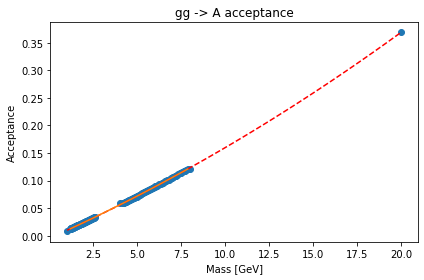

In [2]:
# ACCEPTANCE
mass = np.array([1., 2., 4., 5., 6., 7., 8., 20.])
acc_amumu = np.array([0.0081, 0.0256, 0.0589, 0.0711, 0.0900, 0.1060, 0.1214, 0.3688])
# Inclusive gg2A3
#acc_amumu = np.array([0.0035, 0.0063, 0.0099, 0.0104, 0.0161, 0.0157, 0.0189, 0.0501])
# plusX modes
#acc_amumu = np.array([0.0170, 0.0172, 0.0188, 0.0204, 0.0233, 0.0231, 0.0256, 0.0383])

p = polyfit(mass, acc_amumu, 2)
print(p)
x1 = linspace(1,20)
f1 = polyval(p,x1)
plt.plot(mass, acc_amumu, 'o')
plt.plot(x1,f1,'r--')
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance: Polynomial fit')
#plt.rcParams["figure.figsize"] = (10,6)
plt.tight_layout()
#plt.show()
plt.savefig('ggA_acceptance_pol2_gg2A3.pdf', dpi=1200)
plt.savefig('ggA_acceptance_pol2_gg2A3.png', dpi=1200)
#plt.savefig('ggA_acceptance_pol2_plusXmodes.pdf', dpi=1200)
#plt.savefig('ggA_acceptance_pol2_plusXmodes.png', dpi=1200)

f_acc_amumu = np.poly1d(p)
v_mass = np.array([1.176, 1.187, 1.199, 1.211, 1.223, 1.235, 1.248, 1.26, 1.273, 1.286, 1.299, 1.312, 1.325, 1.338, 1.351, 1.365, 1.378, 1.392, 1.406, 1.42, 1.434, 1.449, 1.463,
1.478, 1.493, 1.508, 1.523, 1.538, 1.553, 1.569, 1.584, 1.6, 1.616, 1.632, 1.649, 1.665, 1.682, 1.699, 1.716, 1.733, 1.75, 1.768, 1.785, 1.803, 1.821, 1.839,
1.858, 1.876, 1.895, 1.914, 1.933, 1.953, 1.972, 1.992, 2.012, 2.032, 2.052, 2.073, 2.094, 2.114, 2.136, 2.157, 2.179, 2.2, 2.222, 2.245, 2.267, 2.29, 2.313,
2.336, 2.359, 2.383, 2.406, 2.43, 2.455, 2.479, 2.504, 2.529, 2.554, 2.58, 2.5801, 4.2009, 4.201, 4.243, 4.286, 4.328, 4.372, 4.415, 4.46, 4.504, 4.549, 4.595, 4.641, 4.687,
4.734, 4.781, 4.829, 4.877, 4.926, 4.975, 5.025, 5.075, 5.126, 5.177, 5.229, 5.282, 5.334, 5.388, 5.442, 5.496, 5.551, 5.606, 5.663, 5.719, 5.776, 5.834, 5.892,
5.951, 6.011, 6.071, 6.132, 6.193, 6.255, 6.318, 6.381, 6.445, 6.509, 6.574, 6.64, 6.706, 6.773, 6.841, 6.909, 6.978, 7.048, 7.119, 7.19, 7.262, 7.334, 7.408,
7.482, 7.557, 7.632, 7.709, 7.786, 7.864])
v_acc_amumu = []
for i in range(len(v_mass)):
    v_acc_amumu.append(f_acc_amumu(v_mass[i]))

plt.scatter(v_mass, v_acc_amumu)
plt.plot(v_mass, v_acc_amumu)
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance')
plt.tight_layout()
#plt.show()
plt.savefig('ggA_newAcceptance_gg2A3.pdf', dpi=1200)
plt.savefig('ggA_newAcceptance_gg2A3.png', dpi=1200)
#plt.savefig('ggA_newAcceptance_plusXmodes.pdf', dpi=1200)
#plt.savefig('ggA_newAcceptance_plusXmodes.png', dpi=1200)

print("Mass points considered: \n", v_mass, '\n')
print("and corresponding acceptance values: \n", v_acc_amumu, '\n')

In [3]:
# BRANCHING RATIO

#br_amumu = np.array([0.021105, 0.026048, 0.002397, 0.002415, 0.001905, 0.001802, 0.001778, 0.001244])
v_br = []

f_br = np.loadtxt("./BR_IV_tgBeta05_allLimits.txt", delimiter = "\t")
#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_br)):
    v_br.append(round(f_br[i][1], 5))
print("Branching ratios: \n", v_br)

Branching ratios: 
 [0.02418, 0.02418, 0.02418, 0.02545, 0.02651, 0.02651, 0.02651, 0.02651, 0.02651, 0.02651, 0.02651, 0.02738, 0.02738, 0.02738, 0.02738, 0.02738, 0.02738, 0.02738, 0.02804, 0.02804, 0.02804, 0.02804, 0.02851, 0.02851, 0.02851, 0.02878, 0.02878, 0.02878, 0.02878, 0.02878, 0.02878, 0.02887, 0.02887, 0.02887, 0.02879, 0.02879, 0.02879, 0.02879, 0.02854, 0.02854, 0.02854, 0.02854, 0.02854, 0.02814, 0.02814, 0.02814, 0.02758, 0.02758, 0.02758, 0.02688, 0.02688, 0.02688, 0.02688, 0.02688, 0.02605, 0.02605, 0.02605, 0.02508, 0.02508, 0.02399, 0.02399, 0.02399, 0.02399, 0.02276, 0.02141, 0.02141, 0.02141, 0.02141, 0.01991, 0.01991, 0.01933, 0.01873, 0.01811, 0.01746, 0.0168, 0.01611, 0.01539, 0.01465, 0.01389, 0.01309, 0.01309, 0.00395, 0.00395, 0.00402, 0.00401, 0.00397, 0.00381, 0.00374, 0.00361, 0.00347, 0.0034, 0.00328, 0.0031, 0.00304, 0.00289, 0.00284, 0.0028, 0.00265, 0.00252, 0.00252, 0.00242, 0.00242, 0.00232, 0.00232, 0.00225, 0.00225, 0.00218, 0.00218, 0.00213, 0.

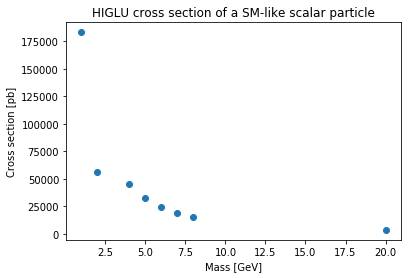

In [4]:
# CROSS SECTION

# Philip's Python Interface
#xsec_higlu_1 = [ 34950.2, 25042.8, 15118.9, 14845.8, 14620.2, 13521.5, 13100.8, 11115.4, 9126.8, 7702.1, 6750.3, 1998.8 ]

# HiGLU standalone
#mass_xsec_1 = np.array([1., 1.1, 1.2, 1.3, 1.5, 1.7, 1.8, 1.9, 2., 2.2, 2.4, 2.6, 2.8, 3., 3.3, 3.5, 3.8, 4., 5., 6., 7., 8.])
#mass_xsec_1 = np.array([1., 1.3, 1.7, 1.8, 1.9, 2., 2.2, 2.4, 2.6, 2.8, 3., 3.3, 3.5, 3.8, 4., 5., 6., 7., 8.])

xsec_higlu_1 = np.array([183357., 55940.7, 45607.8, 32940.1, 24445.4, 18944.6, 15327.4, 3674.1])
#xsec_higlu_1 = np.array([183357, 968517, 1268450, 31498, 560572, 58243, 48356, 55155, 55941, 53423, 51998, 51519, 52277, 55372, 54665, 52536, 48449, 45608, 32940, 24445, 18945, 15327])

plt.scatter(mass, xsec_higlu_1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
plt.title("HIGLU cross section of a SM-like scalar particle")
#plt.tight_layout()
#plt.show()
plt.savefig('xsec_muR1_muF1_removedWeirdValues.pdf', dpi=1200)
plt.savefig('xsec_muR1_muF1_removedWeirdValues.png', dpi=1200)


xsec_fit: 
 [1494390.0, 1270980.0, 1027260.0, 948563.0, 884868.0, 821173.0, 752170.0, 688475.0, 619472.0, 550469.0, 481466.0, 458974.0, 440358.0, 421741.0, 403125.0, 383077.0, 364460.0, 344412.0, 324364.0, 304316.0, 284267.0, 262787.0, 242739.0, 221258.0, 199778.0, 186597.0, 180678.0, 174759.0, 168840.0, 162526.0, 156607.0, 150293.0, 143979.0, 137665.0, 130957.0, 124643.0, 117935.0, 111227.0, 108718.0, 106472.0, 104226.0, 101848.0, 99601.8, 97094.1, 93938.5, 90782.9, 87452.0, 84296.4, 80965.5, 78707.2, 76831.9, 74857.9, 72982.6, 71008.6, 69681.6, 68786.0, 67890.4, 66950.1, 66009.7, 65114.1, 64128.9, 63188.5, 62203.4, 61263.0, 60566.6, 59838.5, 59142.1, 58414.1, 57686.0, 56957.9, 56229.9, 55470.1, 54777.9, 54161.7, 53519.9, 52903.7, 52261.8, 51619.9, 50978.1, 50310.5, 50310.5, 39790.8, 39790.8, 39379.3, 38958.1, 38546.6, 38115.5, 37694.2, 37253.4, 36822.3, 36381.4, 35930.8, 35480.1, 35029.5, 34569.0, 34108.5, 33638.3, 33168.0, 32688.0, 32207.9, 31779.2, 31411.7, 31036.8, 30661.9, 30279.

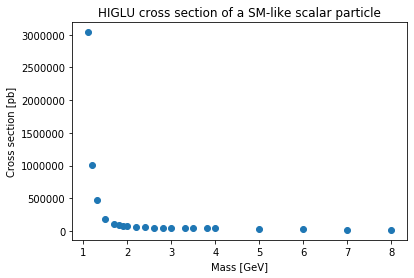

In [5]:
# Philip's Python Interface
#xsec_higlu = [ 2511328.7, 139253.3, 15513.9, 13478.7, 13099.4, 11397.9, 10983.1, 9826.4, 8308.8, 7309.3, 6612.4, 1998.8 ]

mass_xsec = np.array([1.1, 1.2, 1.3, 1.5, 1.7, 1.8, 1.9, 2., 2.2, 2.4, 2.6, 2.8, 3., 3.3, 3.5, 3.8, 4., 5., 6., 7., 8.])

#xsec_higlu = np.array([18718900, 70218.5, 41759.7, 31963.1, 24611.6, 19677.9, 16289.3, 4140.2])
xsec_higlu = np.array([3037930, 1006950, 476158, 189754, 110832, 97620, 80089, 70219, 61263, 54932, 49797, 48612, 51237, 49231, 47662, 44123, 41760, 31963, 24612, 19678, 16289])
plt.scatter(mass_xsec, xsec_higlu)

plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
plt.title("HIGLU cross section of a SM-like scalar particle")
#plt.tight_layout()
#plt.show()
plt.savefig('xsec_muR05_muF05_red_removed1.pdf', dpi=1200)
plt.savefig('xsec_muR05_muF05_red_removed1.png', dpi=1200)

v_xsec = []

f_xsec = np.loadtxt("./xsec_muR05_muF05_allLimits.txt", delimiter = "\t")
#print("shape of data:", f_xsec.shape)
#print("datatype of data:", f_xsec.dtype)
#print("First 5 rows:\n", f_xsec[:5])

for nx in range(len(f_xsec)):
    # 1: values using linear fit in TGRaph; 2: values using spline
    v_xsec.append(f_xsec[nx][1])
    
print("xsec_fit: \n", v_xsec)


In [7]:
# MODEL INDEPENDENT LIMITS on the cross section in pb for different mass points (GeV): 1,2,4,5,6,7,8. 
# Validation: mS = 20 GeV

#obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963 ]
obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963, 0.15 ]

v_obs_limit = []
f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_red_bothYears_twoIDs_90CL_allLimits_20220401.txt", delimiter = "\t")

#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_obs_limit)):
    v_obs_limit.append(round(f_obs_limit[i][1], 5))
print("Model independent observed limits: \n", v_obs_limit)


Model independent observed limits: 
 [0.10629, 0.06227, 0.06734, 0.1256, 0.14417, 0.12771, 0.11784, 0.09993, 0.12855, 0.1264, 0.05861, 0.05892, 0.05906, 0.05879, 0.07964, 0.08702, 0.05914, 0.14196, 0.23539, 0.24589, 0.17446, 0.14078, 0.12273, 0.1067, 0.04802, 0.0481, 0.06097, 0.0617, 0.11398, 0.18246, 0.34418, 0.18161, 0.0951, 0.05883, 0.05443, 0.05639, 0.05509, 0.06682, 0.19429, 0.2117, 0.15719, 0.0859, 0.06416, 0.08093, 0.11942, 0.15278, 0.24453, 0.23744, 0.10775, 0.05824, 0.09505, 0.147, 0.09089, 0.07817, 0.18514, 0.15513, 0.09556, 0.06241, 0.04333, 0.06305, 0.11393, 0.15266, 0.17183, 0.08697, 0.07114, 0.06848, 0.08951, 0.1113, 0.14222, 0.08003, 0.0736, 0.0896, 0.11785, 0.14043, 0.11307, 0.06405, 0.06871, 0.15294, 0.20115, 0.19281, 999999.0, 999999.0, 0.07687, 0.04588, 0.0562, 0.08997, 0.11225, 0.12111, 0.09737, 0.07963, 0.063, 0.0603, 0.0643, 0.10812, 0.14409, 0.11459, 0.05849, 0.06007, 0.07737, 0.08455, 0.10066, 0.09369, 0.08997, 0.07833, 0.07455, 0.08779, 0.14073, 0.1599, 0.08644

In [8]:
# SinTheta LIMITS

senTheta_limit = []
for l in range(len(f_obs_limit)):  
    senTheta = math.sqrt(v_obs_limit[l] / (v_xsec[l] * v_br[l] * v_acc_amumu[l]))
    senTheta_limit.append(round(senTheta,5))
    
senTheta_limit



[0.01529,
 0.01261,
 0.01449,
 0.01994,
 0.02152,
 0.02089,
 0.02082,
 0.01991,
 0.02364,
 0.0247,
 0.01786,
 0.01793,
 0.01821,
 0.01844,
 0.02182,
 0.02323,
 0.01952,
 0.0309,
 0.04025,
 0.0422,
 0.03654,
 0.03391,
 0.03247,
 0.0315,
 0.0221,
 0.02263,
 0.02573,
 0.02615,
 0.03594,
 0.04604,
 0.06403,
 0.0471,
 0.03461,
 0.02766,
 0.02714,
 0.02815,
 0.02842,
 0.03203,
 0.05513,
 0.0578,
 0.05003,
 0.03718,
 0.0323,
 0.03677,
 0.04514,
 0.05162,
 0.06679,
 0.06663,
 0.04552,
 0.03417,
 0.04392,
 0.05499,
 0.04353,
 0.04068,
 0.06381,
 0.05843,
 0.04589,
 0.03783,
 0.03155,
 0.03896,
 0.05244,
 0.06079,
 0.06461,
 0.04728,
 0.04408,
 0.04324,
 0.04944,
 0.05514,
 0.06466,
 0.04852,
 0.04726,
 0.05301,
 0.06186,
 0.06876,
 0.0629,
 0.04834,
 0.05124,
 0.07838,
 0.09235,
 0.0932,
 212.24472,
 327.861,
 0.0909,
 0.06958,
 0.07707,
 0.09798,
 0.1117,
 0.11711,
 0.10689,
 0.09862,
 0.08865,
 0.08834,
 0.0939,
 0.12305,
 0.14582,
 0.13132,
 0.09461,
 0.09869,
 0.11504,
 0.12048,
 0.13428,
 

In [9]:
print("mass: ", len(v_mass))
print("obs lim: ", len(v_obs_limit))
print("xsec: ", len(v_xsec))
print("br: ", len(v_br))
print("acc: ", len(v_acc_amumu))
print("senTheta: ", len(senTheta_limit))

mass:  146
obs lim:  146
xsec:  146
br:  146
acc:  146
senTheta:  146


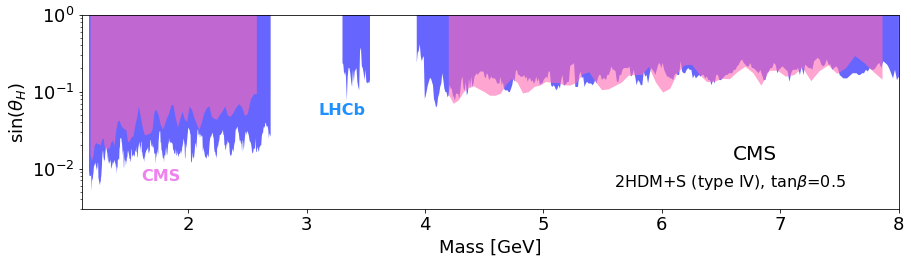

In [12]:
f_LHCb = np.loadtxt("./LHCb_limits.txt", delimiter = " ")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]/1000) #Conversion from Mev to GeV
    v_lim_LHCb.append(f_LHCb[i][1])
    
#f_BaBar = np.loadtxt("./BaBar_limits.txt", delimiter = "\t")
#v_lim_BaBar = []
#v_mass_BaBar = []
#for i in range(len(f_BaBar)):
#    v_mass_BaBar.append(f_BaBar[i][0])
#    v_lim_BaBar.append(f_BaBar[i][1])

p_cms, p_lhcb = plt.subplots(figsize=(13, 4))
plt.rcParams.update({'font.size': 18})
#range = np.array([2.696,3.303])

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.6)
#p_lhcb = plt.semilogx()
p_lhcb = plt.semilogy()
#p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, color="red", label = "BaBar")
p_cms = plt.plot(v_mass, senTheta_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, senTheta_limit, 1, color="hotpink", linewidth=0, alpha=0.6)
#p_cms = plt.fill_between(v_mass, senTheta_limit, color="orange")

plt.xlim(1.1,8)
plt.ylim(0.003, 1.0)
plt.xlabel('Mass [GeV]')
plt.ylabel('sin($\\theta_{H}$)')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")
p_cms = plt.text(1.6, 0.007, "CMS", fontsize=16, color="violet", fontweight='bold')
p_lhcb = plt.text(3.1, 0.05, "LHCb", fontsize=16, color="dodgerblue", fontweight='bold')

plt.text(6.6, 0.013, "CMS", fontsize=20, color="black")
plt.text(5.6, 0.009, "2HDM+S (type IV), tan$\\beta$=0.5", fontsize=16, verticalalignment='top')
#plt.show()
plt.tight_layout()
plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances.pdf', dpi=1200)
plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances.png', dpi=1200)